## Section 7: Eigendecomposition and Principal Component Analysis with NumPy and SciPy

### Eigendecomposition

Another ultra-powerful linear algebra tool in NumPy and SciPy is _**eigendecomposition**_.   Don't know what this is?  Sure you've heard of it, because it is closely related to both SVD and to this magical thing called _principal component analysis_ which we will get to in a second.  

Summery version:
A matrix **A** applied to column vector **x**, that is **Ax**, is a linear transformation of **x**.  

There is a special transform in the following form:
**Ax** = $\lambda$**x**

where **A** is nxn matrix, $x$ is $n$x1 column vector ($X$ $\ne$ 0), and $\lambda$ is some scalar. Any $\lambda$ that satisfies the above equation is known as an _eigenvalue_ of the matrix **A**, while the associated vector **x** is called an _eigenvector_ corresponding to $\lambda$.   

Not quite clear? Here's some more detail.

#### Motivation

When we think of a think of a vector, we think of a geometric line with some direction and magnitude.   

We know that a vector $x$ can be transformed to a different vector by multiplying by matrix $A$ -> $A𝑥$. The effect of the transformation represents a scale of the length of the vector and/or the rotate of the vector. 

Matrix-vector multiplication can be thought of then as a way of rotating and scaling that vector.  For some vectors, the effect of transformation of $Ax$ is only scale (stretching, compressing, and flipping). 
 Here's a simple way of visualizing:

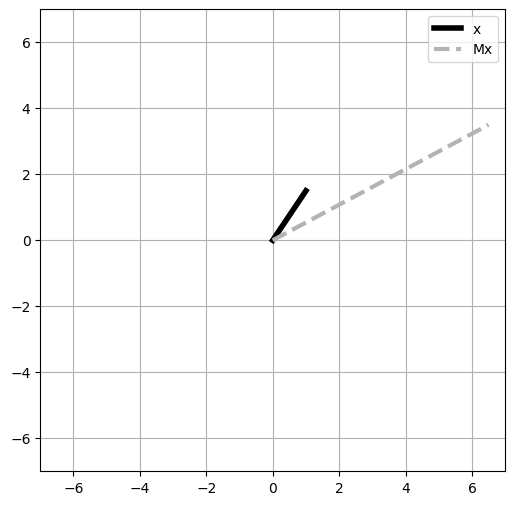

In [2]:

import numpy as np
import matplotlib.pyplot as plt

# some matrix
M  = np.array([ [2,3],[2,1] ])
x  = np.array([ [1,1.5] ]).T # transposed into a column vector!
Mx = M.dot(x)


plt.figure(figsize=(6,6))

plt.plot([0,x[0,0]],[0,x[1,0]],'k',linewidth=4,label='x')
plt.plot([0,Mx[0,0]],[0,Mx[1,0]],'--',linewidth=3,color=[.7,.7,.7],label='Mx')
plt.xlim([-7,7])
plt.ylim([-7,7])
plt.legend()
plt.grid()
plt.show()




Now, let's try a different vector with the same matrix: e.g. just swapping the x and y positions:

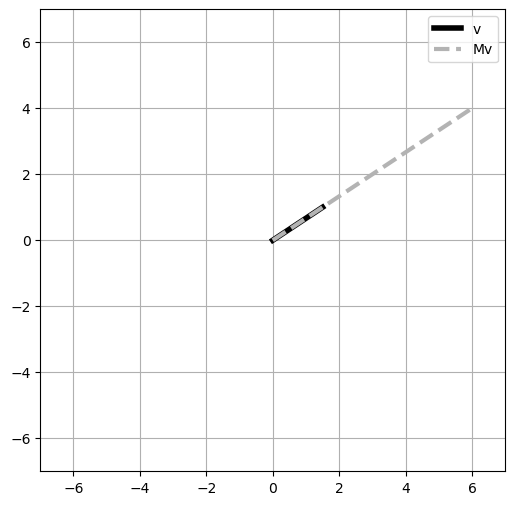

In [3]:

M  = np.array([ [2,3],[2,1] ])
v  = np.array([ [1.5,1] ]).T # transposed into a column vector!
Mv = M.dot(v)


plt.figure(figsize=(6,6))

plt.plot([0,v[0,0]],[0,v[1,0]],'k',linewidth=4,label='v')
plt.plot([0,Mv[0,0]],[0,Mv[1,0]],'--',linewidth=3,color=[.7,.7,.7],label='Mv')
plt.xlim([-7,7])
plt.ylim([-7,7])
plt.legend()
plt.grid()
plt.show()





The above examples are from ``def ex1`` in ``eigendecomp.py``.

Note what is different.  The matrix-vector product is no longer rotated.  The matrix is still scaled it has the same direction as the input vector $v$.   I.e. this matrix-vector multiplication acts _as if_ it were a scalar-vector multiplication (taking a vector and just multiplying the entries).   In this case, $v$ is then an _eigenvector_ of the matrix $M$.  This is our introduction to _eigendecomposition_.

#### Basics of Eigendecomposition

Okay, so what is eigendecomposition?  The above example gives a geometric definition: an _eigenvector_ of a matrix is one where a matrix _stretches_ but does not rotate a vector.  The amount of stretching done is then the _eigenvalue_.  

The figures below show vectors before and after multiplication by a 2x2 matrix from the source code in ``def ex2()``.  The two vectors on the left are eigenvectors whereas the two vectors in the right plot are not eigenvectors.   The eigenvectors point in the same direction before and after being multiplied by the matrix.

![](./figures/Figure_5_eigendemo3.png)

Here's another example from ``def ex3()``

In [12]:
def ex3(vnumber=1):
 #plt.style.use('seaborn-poster')
 plt.style.use('seaborn-v0_8-poster')   
 
 A = np.array([[2, 0],[0, 1]])   
 
 if vnumber == 1:


  x = np.array([[1],[1]])
  b = np.dot(A, x)
  plot_vect(x,b,(0,3),(0,2))

 else:
#different version
  x = np.array([[1], [0]])
  b = np.dot(A, x)

  plot_vect(x,b,(0,3),(-0.5,0.5))
     
#Ax=b, so b=np.dot(A,x) 
def plot_vect(x, b, xlim, ylim):
    '''
    function to plot two vectors, 
    x - the original vector
    b - the transformed vector
    xlim - the limit for x
    ylim - the limit for y
    '''
    plt.figure(figsize = (10, 6))

#quiver(starting_x,starting_y, direction_x,direction_y)...
    #so this will draw an arrow with origin at 0,0 and then a direction x[0],x[1] or b[0],b[1]
#angles='xy': Arrow direction in data coordinates, i.e. the arrows point from (x, y) to (x+u, y+v).
    
    plt.quiver(0,0,x[0],x[1],\
        color='k',angles='xy',\
        scale_units='xy',scale=1,\
        label='Original vector')
    plt.quiver(0,0,b[0],b[1],\
        color='g',angles='xy',\
        scale_units='xy',scale=1,\
        label ='Transformed vector')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

We get the following:

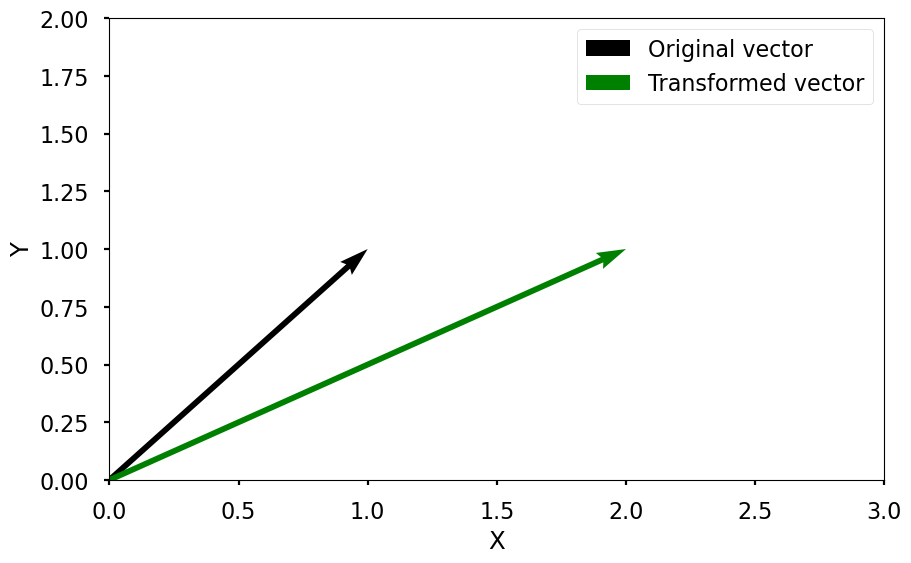

In [13]:
ex3()

We can see from the generated figure that the original vector 𝑥 is rotated and stretched longer after transformed by 𝐴. The vector [[1], [1]] is transformed to [[2], [1]]. Let’s try to do the same exercise with a different vector [[1], [0]].

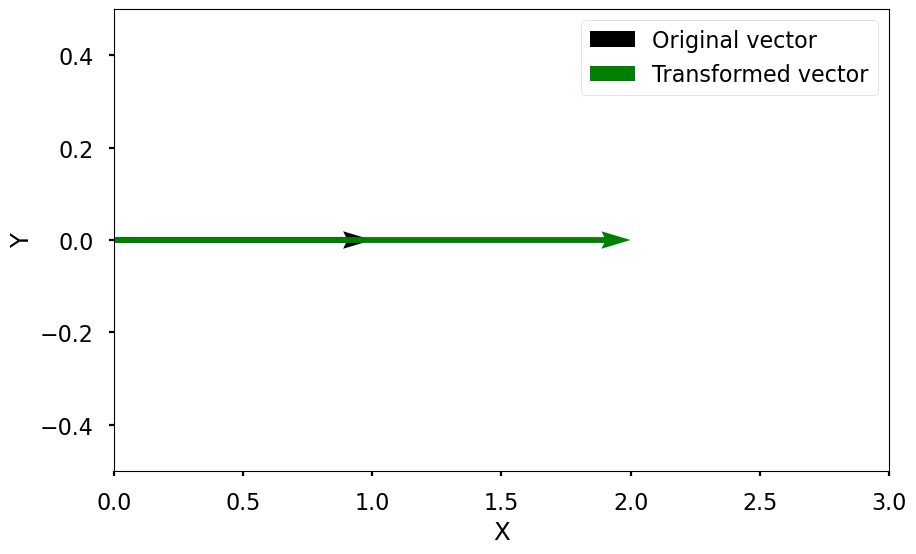

In [6]:
ex3(vnumber=2)

with this new vector, the only thing changed after the transformation is the length of the vector, it is stretched. The new vector is [[2], [0]], therefore, the transform is

$𝐴𝑥$=2$x$

**Eigendecomposition works for square matrices**.   Like SVD, it often crops up with correlation or covariance matrices (more on that later).   Every square matrix of dimensions $M x M$ has $M$ eigenvalues (scalars) and $M$ corresponding eigenvectors.  Eigendecomposition then computes these scalar-vector pairs.   

The main eigenvalue equation is very simple:

$\textbf{A}$$\textbf{v}$=$\lambda$$\textbf{v}$.  

 To be clear this is not saying that the matrix **A** is the same thing as a scalar $\lambda$.  Rather, _the effect or consequence of the matrix operating on the vector_ is the same as the effect of the scalar operating on that same vector.

#### Finding Eigenvalues and Eigenvectors

So how can we find eigenvalues and eigenvectors?   Thankfully, NumPy makes this very easy with ``np.linalg.eig`` and ``np.linalg.eigh`` ***.  

(*** the latter stands for "Hermitian", which works for Hermitian matrices (a matrix that is equal to is complex-conjungate transpose).  This works if you have square arrays and we will encounter this more when we do PCA.   A consequence is that the algorithm then sorts the eigenvalues and eigenvectors by size.  This is a good thing that will help us later but for now let's use ``np.linalg.eig``)

E.g.

In [67]:

matrix=np.array([[1,2],[3,4]])
evals,evecs=np.linalg.eig(matrix)

#evals
#array([-0.37228132,  5.37228132])
print(evals)
print('')
#evecs
#array([[-0.82456484, -0.41597356],
 #      [ 0.56576746, -0.90937671]])
print(evecs)

print(evecs.shape,evals.shape)

[-0.37228132  5.37228132]

[[-0.82456484 -0.41597356]
 [ 0.56576746 -0.90937671]]
(2, 2) (2,)


Here's another example:

In [73]:

a = np.array([[2, 2, 4], 
              [1, 3, 5],
              [2, 3, 4]])
              
w,v=np.linalg.eig(a)

print('E-value:', w)


print('E-vector', v)




E-value: [ 8.80916362  0.92620912 -0.73537273]
E-vector [[-0.52799324 -0.77557092 -0.36272811]
 [-0.604391    0.62277013 -0.7103262 ]
 [-0.59660259 -0.10318482  0.60321224]]


And we can do the same thing with SciPy

In [75]:

from scipy import linalg
matrix=np.array([[1,2],[3,4]])
evals,evecs=linalg.eig(a)

print(evals.real) #scipy.linalg.eig will sometimes return complex numbers depending on the input matrix


evecs




[ 8.80916362  0.92620912 -0.73537273]


array([[-0.52799324, -0.77557092, -0.36272811],
       [-0.604391  ,  0.62277013, -0.7103262 ],
       [-0.59660259, -0.10318482,  0.60321224]])

Okay fine, we can compute eigenvalues and eigenvectors.  So?  We gain a bit more insight if we rearrange the eigenvalue equation:

$\textbf{A}$$\textbf{v}$=$\lambda$$\textbf{v}$

$\textbf{A}$$\textbf{v}$-$\lambda$$\textbf{v}$=0

($\textbf{A}$-$\lambda$$\textbf{I}$)$\textbf{v}$=0

Note the imposition of the identity matrix $\textbf{I}$ (A matrix minus a scalar is not a thing/wrong dimensionality: we have to operate element-wise).  


And then ...

$\tilde{\textbf{A}}$ = $\textbf{A}$-$\lambda$$\textbf{I}$, so

$\tilde{\textbf{A}}$$\textbf{v}$ = 0 

In other words, the eigenvector is in the nullspace of the matrix shifted by its eigenvalue.  A matrix shifted by its eigenvalue is singular, because only singular matrices have non-trivial (e.g. v=0) null space.  Because singular matrices have determinants of zero, |$\textbf{A}$-$\lambda$$\textbf{I}$| =0.   I.e. we shift a matrix by its (unknown) eigenvalue $\lambda$, set its determinant to zero and solve for $\lambda$.   For the case of a simple 2x2 matrix with elements $\left[ {\begin{array}{cc}
   a & b \\
   c & d \\
  \end{array} } \right]$, shifting by eigenvalues $\lambda$ leads to the equation:
  
  $\left[ {\begin{array}{cc}
   a & b \\
   c & d \\
  \end{array} } \right]$ - $\lambda \left[ {\begin{array}{cc}
   1 & 0 \\
   0 & 1 \\
  \end{array} } \right]$, or $\lambda^{2} - (a+d)\lambda + (ad-bc)$ = 0.   I.e. this is a second order polynomial equation with thus two solutions.  A 3x3 matrix? The leading term is $\lambda^{3}$ and so on.  In other words, the characteristic polynomial of an $M$x$M$ matrix will have $\lambda^{M}$ term and a $M$x$M$ matrix will have $M$ eigenvalues.
  
Okay, great but where do the eigenvectors actually come from?
  

Here's a numerical example.  The following is a matrix and its eigenvalues:

$\left[ {\begin{array}{cc}
   1 & 2 \\
   2 & 1 \\
  \end{array} } \right]$, $\lambda_{1}$ = 3, $\lambda_{2}$ = -1.
  
 Take the case of $\lambda_{1}$.   To reveal its eigenvector, shift the matrix by $\lambda_{1}$ and find a vector in its null space:
 
 $\left[ {\begin{array}{cc}
   1-3 & 2 \\
   2 & 1 -3\\
  \end{array} } \right]$ =  $\left[ {\begin{array}{cc}
  -2 & 2 \\
   2 &-2\\
  \end{array} } \right]$ $\left[ {\begin{array}{cc}
  x1 \\
  x2\\
  \end{array} } \right]$ = $\left[ {\begin{array}{cc}
  0 \\
  0\\
  \end{array} }\right]$
  
  We are left with 
  $\left[ {\begin{array}{cc}
  -2*x1+2*x2 \\
   2*x1-2*x2\\
  \end{array} } \right]$=$\left[ {\begin{array}{cc}
  0 \\
  0\\
  \end{array} }\right]$
  
  Here, x1=1 and x2=1 work just fine.   
  
  This means that [1 1] is an eigenvector of the matrix associated with an eigenvalue of 3.   Now this was a really trivial example.   In practice, these vectors are found by using Gauss-Jordan elimination to solve a system of equations.   But we don't need to worry about that for this class.
  

#### _Diagonalizing a Square Matrix_ 

In the example above, the eigenvalue equation lists one eigenvalue and one corresponding eigenvector.  But we can do a lot better than that.   Specifically, it follows that an $M$x $M$ matrix has $M$ eigenvalue equations:

$\textbf{A}$**v$_{1}$** = $\lambda_{1}$**v$_{1}$**

...

$\textbf{A}$**v$_{M}$** = $\lambda_{M}$**v$_{1}$**

Now, this series of equations is a bit ugly.   So we can rewrite it in a more succinct manner.   Instead of storing the eigenvalues in a vector, we store the eigenvalues in the diagonal of a matrix **$\Lambda$**

I.e. the righthand side of the previous series of equations can be summarized as ...

$\left[ {\begin{array}{cc}
   v11 & v12  & v13 \\
   v12 & v22  & v23 \\
   v13 & v32  & v33 \\
  \end{array} } \right]$ $\left[ {\begin{array}{cc}
   \lambda_{1} & 0  & 0 \\
   0 & \lambda_{2}  & 0\\
   0 & 0  & \lambda_{3} \\
  \end{array} } \right]$ = $\left[ {\begin{array}{cc}
   \lambda_{1}v11 & \lambda_{2}v12  & \lambda_{3}v13 \\
   \lambda_{1}v12 & \lambda_{2}v22  & \lambda_{3}v23 \\
   \lambda_{1}v13 & \lambda_{2}v32  & \lambda_{3}v33 \\
  \end{array} } \right]$

More generally, then, the matrix-eigenvalue equation can be written as 


**AV** = **V$\Lambda$**

This result then has the following consequences (these are equivalent statements produced by inverting matrices or multiplying both sides by the same matrix):

$\textbf{A}$ = $\textbf{V}\Lambda\textbf{V}^{-1}$

$\Lambda$= $\textbf{V}^{-1}\textbf{A}\textbf{V}$

The first equation shows that **A** becomes diagonal inside the space of **V** (i.e. **V** moves us into the "diagonal space", and then $V^{-1}$ gets us back out).  This can be interpreted in the context of basis vectors: **A** is dense in the standard basis, but then we apply a set of transformations (**V**) to rotate the matrix into a new set of basis vectors (i.e. the eigenvectors) in which the information is sparse and represented by a diagonal matrix. 

#### _Implementing Eigendecomposition in Python ... and Reconstruction_ 

The above equations describing the relationships between eigenvalues, eigenvectors, and the original matrix are key.

As an example of implementing eigendecomposition in Python and then reconstructing the original matrix **A** again, see below.

In this example we start with a 4x4 matrix of random numbers: ``M=np.random.rand(4,4)``.  

Then perform eigendecomposition:

In [85]:
M=np.random.rand(4,4)
Lambda, V = np.linalg.eig(M)
print('')
print(Lambda.real)
print('')
print(V.real)
print('')
print(V)



[ 1.40238761 -0.12099248 -0.12099248 -0.15824188]

[[ 0.4162979   0.76378712  0.76378712  0.81230837]
 [ 0.37294819  0.06852254  0.06852254 -0.57212584]
 [ 0.39620069 -0.02273699 -0.02273699 -0.04097377]
 [ 0.72844404 -0.46982251 -0.46982251 -0.10558542]]

[[ 0.4162979 +0.j          0.76378712+0.j          0.76378712-0.j
   0.81230837+0.j        ]
 [ 0.37294819+0.j          0.06852254+0.13761085j  0.06852254-0.13761085j
  -0.57212584+0.j        ]
 [ 0.39620069+0.j         -0.02273699+0.33256959j -0.02273699-0.33256959j
  -0.04097377+0.j        ]
 [ 0.72844404+0.j         -0.46982251-0.24727405j -0.46982251+0.24727405j
  -0.10558542+0.j        ]]


To calculate all the components of the eigendecomposition, we need $\Lambda$ and $V^{-1}$.  

First, for the eigenvalues $\Lambda$ we just have to transform "Lambda" into a diagonal matrix:

In [86]:

bLambda=np.diag(Lambda)
bLambda2=np.diag(Lambda2)

print(bLambda)
print(bLambda2)


[[ 1.40238761+0.j          0.        +0.j          0.        +0.j
   0.        +0.j        ]
 [ 0.        +0.j         -0.12099248+0.24912194j  0.        +0.j
   0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j         -0.12099248-0.24912194j
   0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j          0.        +0.j
  -0.15824188+0.j        ]]
[[-0.82689952  0.          0.          0.        ]
 [ 0.         -0.48809138  0.          0.        ]
 [ 0.          0.          0.4283884   0.        ]
 [ 0.          0.          0.          1.70729606]]


Second, we use ``np.linalg.inv`` to compute $V^{-1}$:

In [87]:

Vinv=np.linalg.inv(V)


print(Vinv)




[[ 0.41517975+0.00000000e+00j  0.43090981+0.00000000e+00j
   0.35741196-1.52410200e-16j  0.72050509+7.62051002e-17j]
 [ 0.39882885+2.03515292e-01j  0.65617716+3.01435283e-01j
  -0.49185952-1.30261497e+00j -0.29635305+4.37856861e-01j]
 [ 0.39882885-2.03515292e-01j  0.65617716-3.01435283e-01j
  -0.49185952+1.30261497e+00j -0.29635305-4.37856861e-01j]
 [ 0.26827356+3.85250450e-17j -1.45479996+1.00526400e-17j
   0.74178983-4.55045638e-17j  0.18805239-1.29943841e-18j]]


Now, we have all the ingredients we need to reconstruct **A**.  And we do that exactly in the same way we reconstructed matrices from SVD:

In [89]:

Mrecon = np.dot(V,np.dot(bLambda, Vinv))





print(M-Mrecon.real)



[[ 0.00000000e+00 -5.55111512e-17 -1.11022302e-16 -4.99600361e-16]
 [-1.11022302e-16 -1.73472348e-16 -1.11022302e-16 -2.22044605e-16]
 [-8.32667268e-17 -2.77555756e-16 -2.77555756e-17 -1.66533454e-16]
 [-5.55111512e-16 -5.55111512e-16 -1.38777878e-16 -5.55111512e-16]]


The tiny difference between  **M** and **Mrecon** ($\sim$ machine precision level) confirms that we have successfully reconstructed **M**.

#### _Eigendecomposition of Singular Matrices_

We have said before that if you have a singular matrix (has a determinant of zero) you are in trouble because you cannot invert that matrix.  However, you can eigendecompose a singular matrix.

Here's an example:

In [90]:

a=np.array([[1,4,7],[2,5,8],[3,6,9]])
L,V=np.linalg.eig(a)

print('Rank = {0} \n'.format(np.linalg.matrix_rank(a)))
print('Eigenvalues: {0}'.format( L.round(2)))
print('Eigenvectors: {0}'.format(V.round(2)))

#Rank = 2 
#Eigenvalues: [16.12 -1.12 -0.  ]
#Eigenvectors: [[-0.46 -0.88  0.41]
# [-0.57 -0.24 -0.82]
# [-0.68  0.4   0.41]]


Rank = 2 

Eigenvalues: [16.12 -1.12 -0.  ]
Eigenvectors: [[-0.46 -0.88  0.41]
 [-0.57 -0.24 -0.82]
 [-0.68  0.4   0.41]]


This matrix has a rank of 2.  It has one zero-valued eigenvalu with a nonzero eigenvector.   

For singular matrices, at least one eigenvalue is guaranteed to be zero.   This doesn'tm ean that the number of nonzero eigenvalues equals the rank of the matrix -- that's true for singular values (the scalar values from SVD) but not for eigenvalues.   But if the matrix is singular, then at least one eigenvalue equals zero.

The converse is true:  every full-rank matrix has zero zero-valued eigenvalues.

The point of this section: 1) eigendecomposition is valid for reduced rank matrices and 2) the presence of at least one zero-valued eigenvalue indicates a reduced-rank matrix.

#### _A few other notes ..._ 

Now, before we get to the fun stuff there are a few other things to mention.

*  Eigenvectors are stored in the Columns, not Rows. ---   Now, sometimes if you forget this, you will try to do some linear algebra operation that triggers a broadcasting error ... but not always.   So keep this in mind: columns not rows.

* Sign and Scale Indeterminancy of Eigenvectors -- Go back to our example eigenvector determination of [1 1].   Sure that works.  But so does [2 2] or [-10.7 10.7] etc.   Any _scaled_ version of the vector [1 1] is a basis for that the null space.  In other words, if **v** is an eigenvector of a matrix, then so is $\alpha$**v**, where $\alpha$ is a non-zero scalar.

* Eigendecomposition works with square matrices only -- Just thought I would repeat this point for emphasis.



---

Now, so far this seems a bit like SVD.   We have decomposed a matrix and get back something (eigenvalues and eigenvectors, in this case).  SVD and eigendecomposition are powerful because we can make Python _truncate_ these matrices to filter out noise (or in more jargony language, filter out the components that do not explain much of the variance we see).   And that leads us to _principle component analysis_.